##### Decision Tree
 
Assignment
About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [432]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [433]:
import warnings
warnings.filterwarnings("ignore")

In [434]:
#load the dataset & check shape of dataset.
df=pd.read_csv('Company_Data.csv')
df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [435]:
print(df.shape)

(400, 11)


In [436]:
#Rename the column
df=df.rename({'ShelveLoc':'Shelve_qlt'},axis=1)
df.head()

Sales  CompPrice  Income  Advertising  Population  Price Shelve_qlt  Age  \
0   9.50        138      73           11         276    120        Bad   42   
1  11.22        111      48           16         260     83       Good   65   
2  10.06        113      35           10         269     80     Medium   59   
3   7.40        117     100            4         466     97     Medium   55   
4   4.15        141      64            3         340    128        Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

## EDA and Visualization

In [437]:
#checking information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   Shelve_qlt   400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [438]:
#check duplicated values
df.duplicated().sum()

0

There is no any duplicated row.

In [439]:
#check correlation
df.corr()

Sales  CompPrice    Income  Advertising  Population     Price  \
Sales        1.000000   0.064079  0.151951     0.269507    0.050471 -0.444951   
CompPrice    0.064079   1.000000 -0.080653    -0.024199   -0.094707  0.584848   
Income       0.151951  -0.080653  1.000000     0.058995   -0.007877 -0.056698   
Advertising  0.269507  -0.024199  0.058995     1.000000    0.265652  0.044537   
Population   0.050471  -0.094707 -0.007877     0.265652    1.000000 -0.012144   
Price       -0.444951   0.584848 -0.056698     0.044537   -0.012144  1.000000   
Age         -0.231815  -0.100239 -0.004670    -0.004557   -0.042663 -0.102177   
Education   -0.051955   0.025197 -0.056855    -0.033594   -0.106378  0.011747   

                  Age  Education  
Sales       -0.231815  -0.051955  
CompPrice   -0.100239   0.025197  
Income      -0.004670  -0.056855  
Advertising -0.004557  -0.033594  
Population  -0.042663  -0.106378  
Price       -0.102177   0.011747  
Age          1.000000   0.006488  
Education    0.006488   1.000000

<AxesSubplot:>

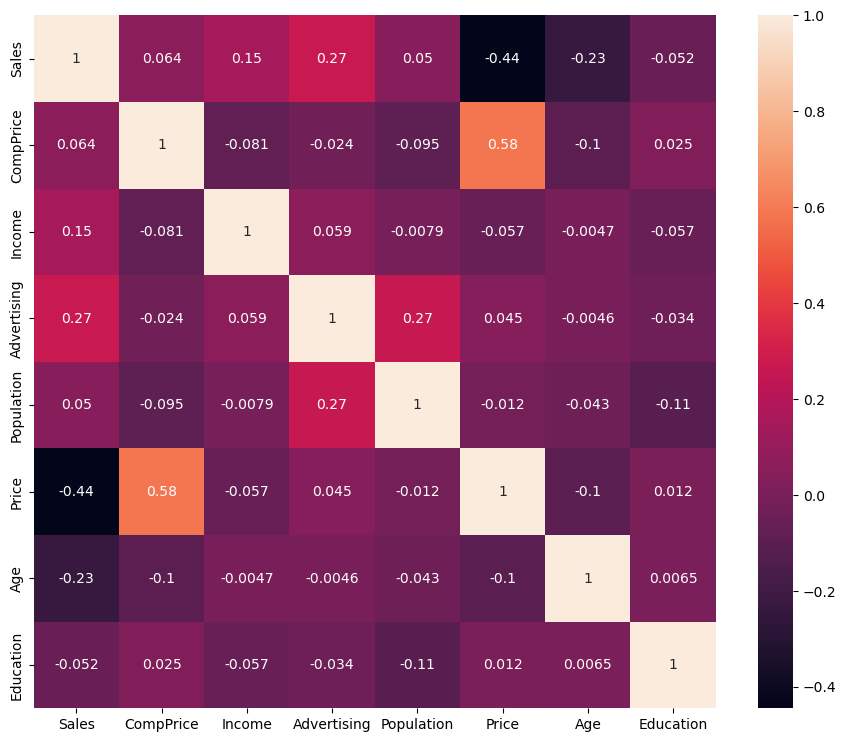

In [440]:
#Plot heatmap to see rectangular data as a color-encoded matrix.
plt.figure(figsize=(11,9))
sns.heatmap(df.corr(),annot=True)

Competitor Price(Price charged by competitor at each location) & Price (Price company charges for car seats at each site) these two features are highly correlated.

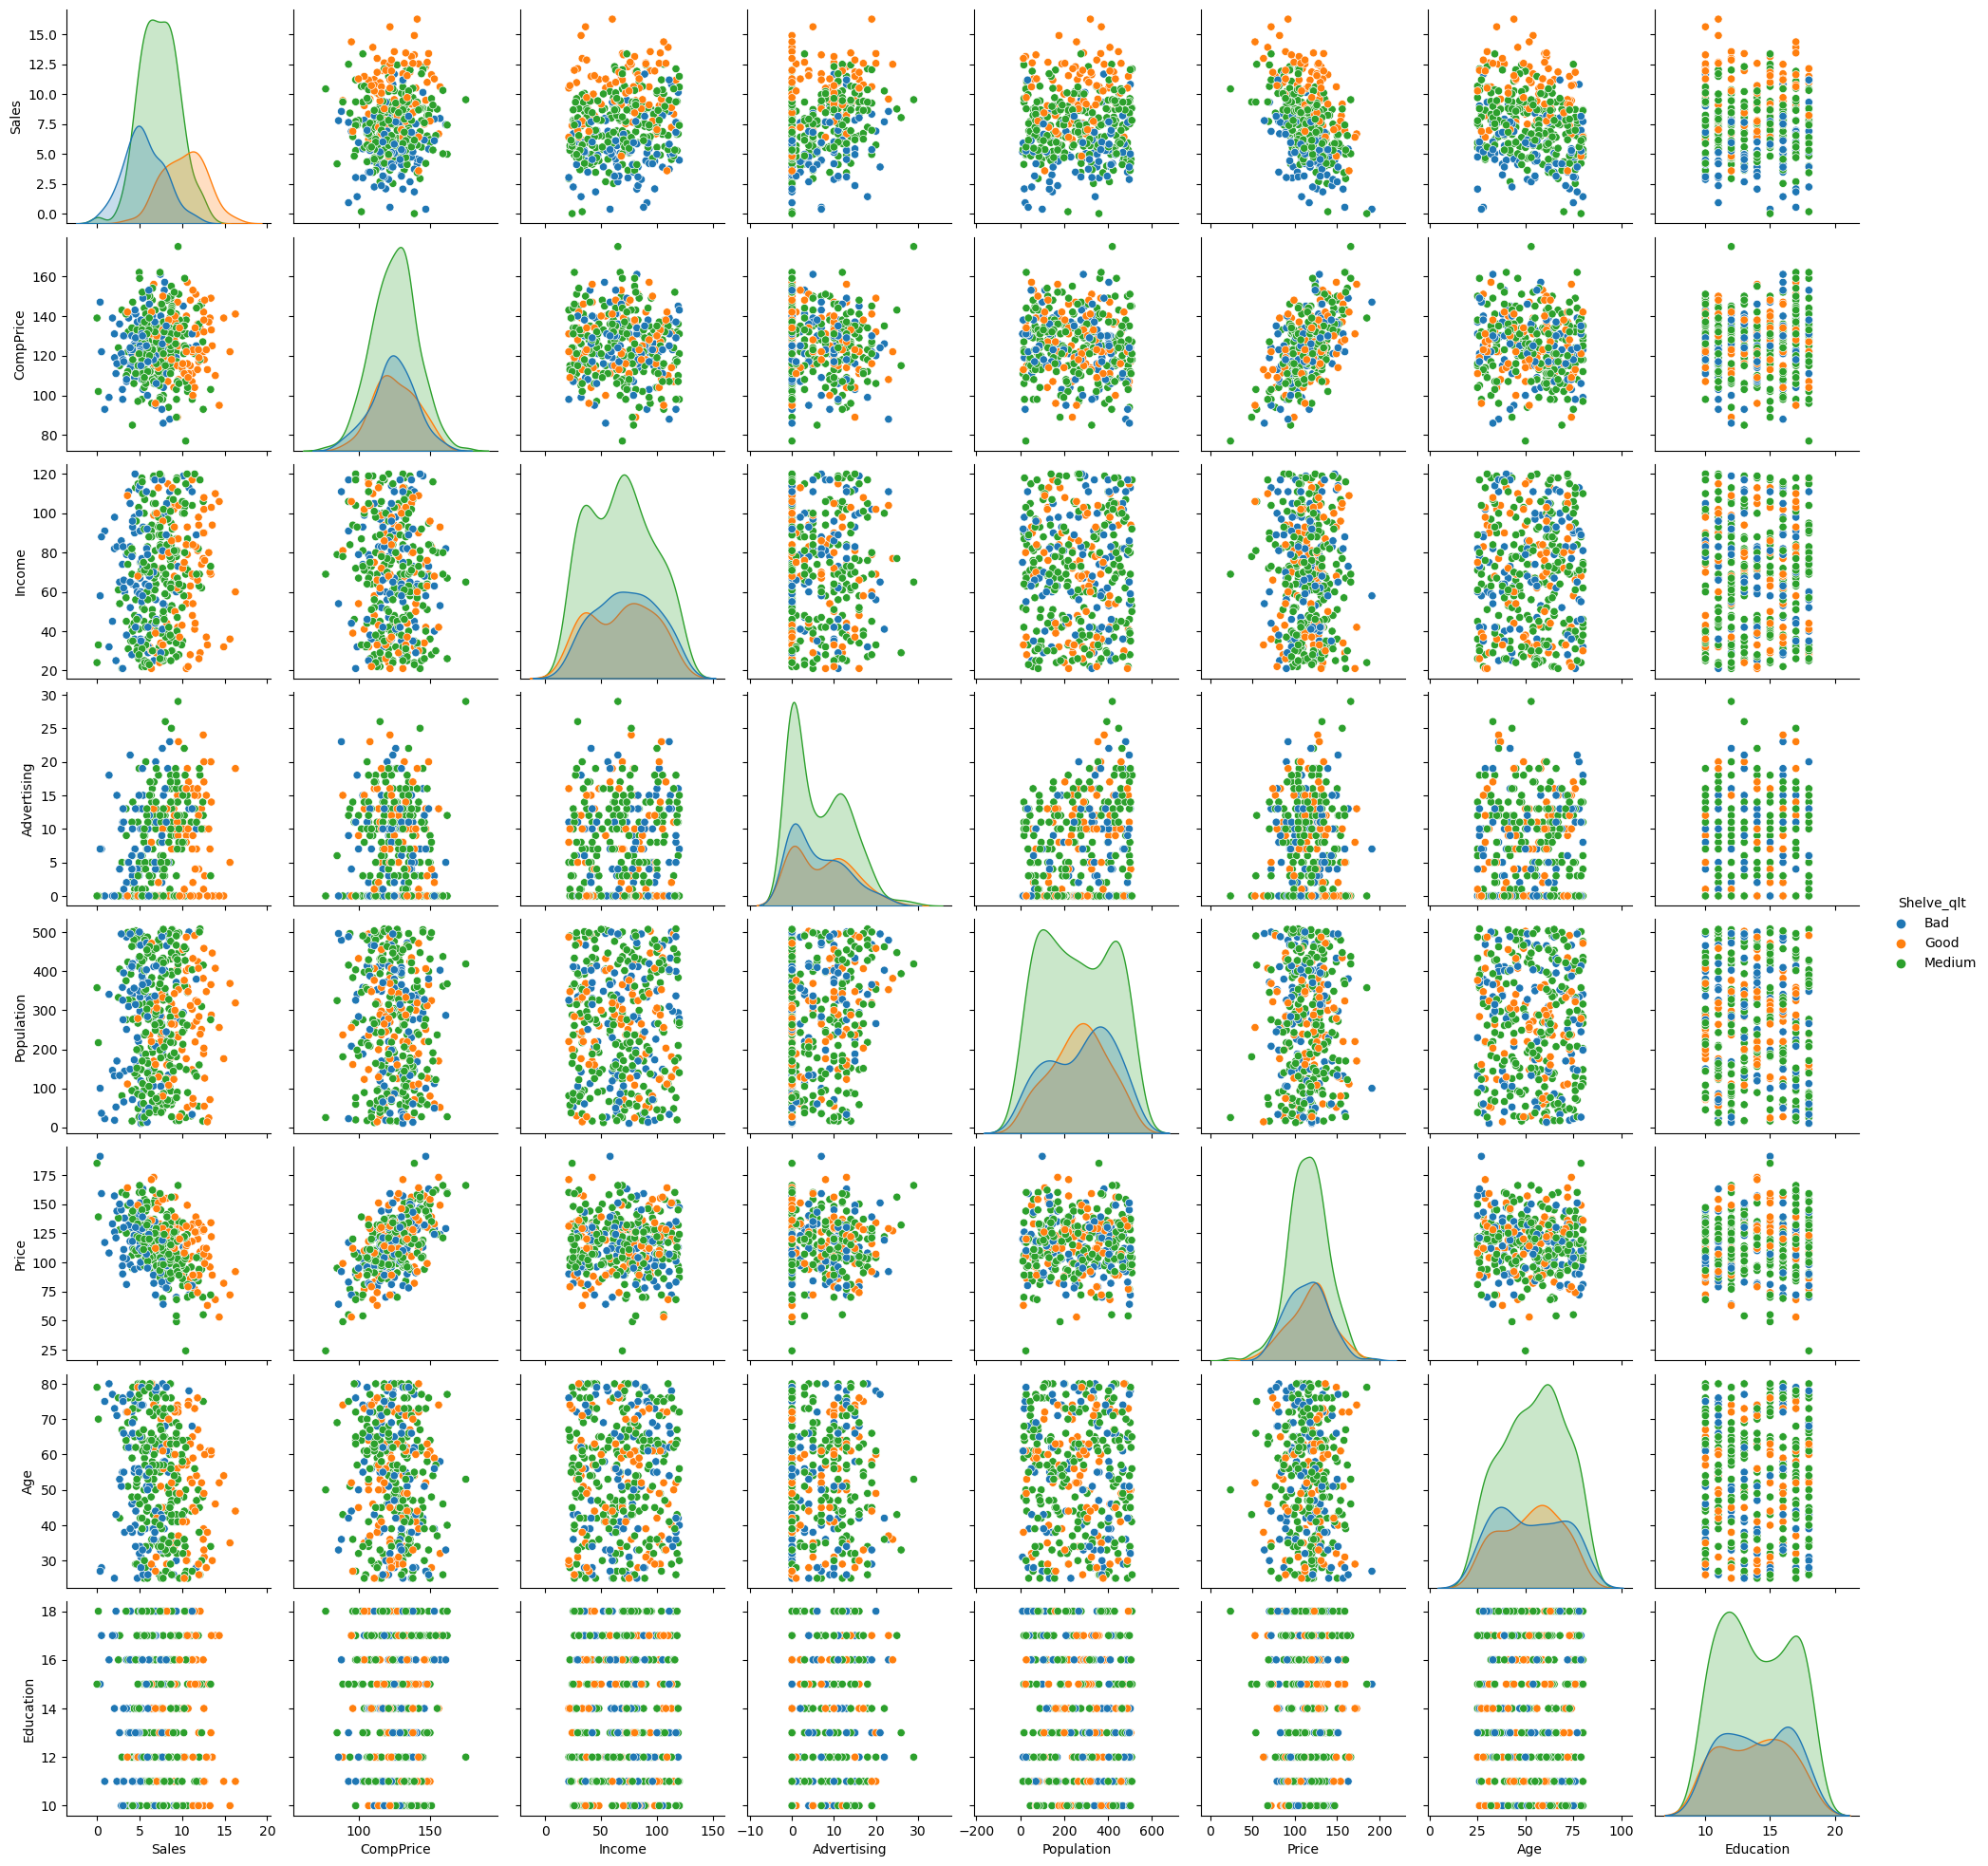

In [441]:
#plot pairplot to visualoze pairwise relationship of all the atributes at once.
sns.pairplot(data=df,hue='Shelve_qlt')

In pairplot a factor with Blue dots are Bad,with Orange dots are Good and with Medium dots are indicating the quality of the shelving location for the car seats at each site.

<AxesSubplot:>

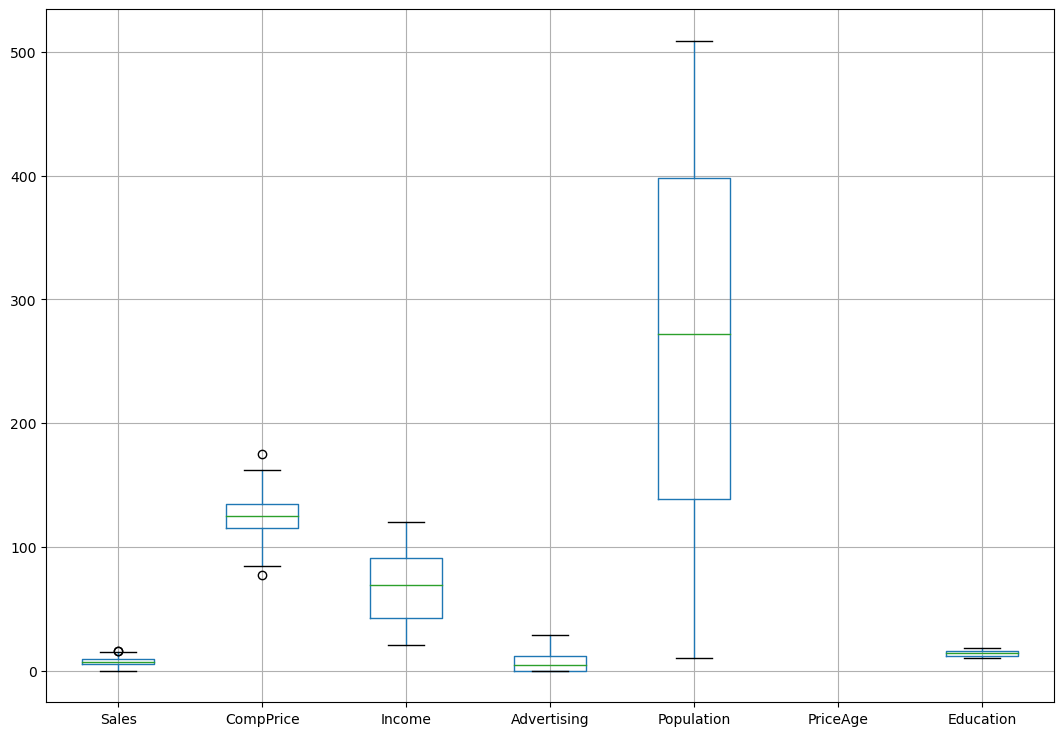

In [442]:
#plot boxplot to visualize distribution of all the numerical columnns at once..
plt.figure(figsize=(13,9))
pd.DataFrame(data=df,columns=['Sales','CompPrice','Income','Advertising','Population','Price''Age','Education']).boxplot()

The distribution of segment population is widely distributed over all other segments.

### A cloth manufacturing company is interested to know about the segment or attributes causes high sale.

### visualize categorical columns with sales at each location.

### 1.sales vs shelve_qlt

Shelve_qlt
Bad        530.20
Good       868.19
Medium    1600.14
Name: Sales, dtype: float64

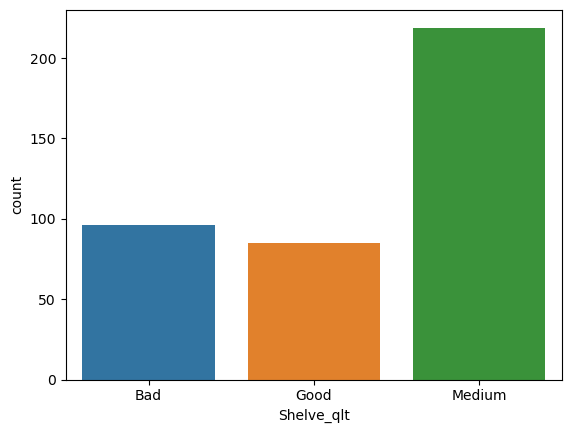

In [443]:
sns.countplot(df['Shelve_qlt'],label='sales')
x = df["Sales"].groupby(df["Shelve_qlt"])
x.sum() 

This shows The Higher Sales causes at Medium quality of the shelving location for the car seats

### 2.Sales vs Urban

Urban
No      892.50
Yes    2106.03
Name: Sales, dtype: float64

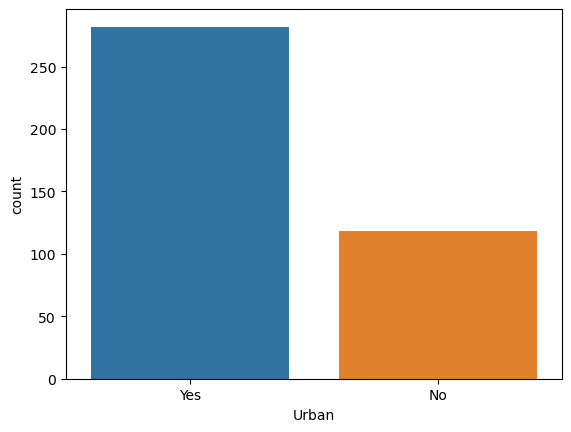

In [444]:
sns.countplot(df['Urban'],label='sales')
y = df["Sales"].groupby(df["Urban"])
y.sum() 

Urban:A factor with levels No and Yes to indicate whether the store is in an Urban or Rural location.

From above plot we conclude that Higher Sales caused in Urban location.

### 3.Sales vs US

US
No      968.87
Yes    2029.66
Name: Sales, dtype: float64

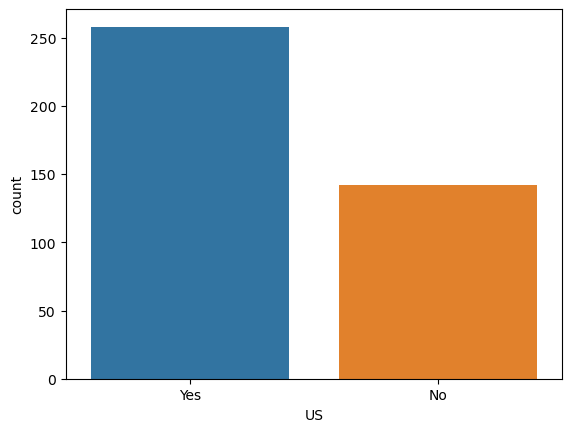

In [445]:
sns.countplot(df['US'],label='sales')
z = df["Sales"].groupby(df['US'])
z.sum() 

US:A factor with levels No and Yes to indicate whether the store is in the US or not.

From above plot we conclude that Higher Sales caused in US.

In [446]:
#Creating dummy vairables dropping first dummy variable
df=pd.get_dummies(df,columns=['Urban','US','Shelve_qlt'], drop_first=True)

In [ ]:
# #we apply .map function on target to convert categorical data into Numbers.
# df['Shelve_qlt']=df['Shelve_qlt'].map({'Good':1,'Medium':2,'Bad':3})
# df

In [447]:
df.head()

Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0   9.50        138      73           11         276    120   42         17   
1  11.22        111      48           16         260     83   65         10   
2  10.06        113      35           10         269     80   59         12   
3   7.40        117     100            4         466     97   55         14   
4   4.15        141      64            3         340    128   38         13   

   Urban_Yes  US_Yes  Shelve_qlt_Good  Shelve_qlt_Medium  
0          1       1                0                  0  
1          1       1                1                  0  
2          1       1                0                  1  
3          1       1                0                  1  
4          1       0                0                  0

In [448]:
# converting Sales column in categoric column
bins = [0, 5, 8.5, 16]
labels = ['bad', 'medium', 'good']


df['sales'] = pd.cut(df['Sales'], bins=bins, labels=labels, include_lowest=True)
df.head()

Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0   9.50        138      73           11         276    120   42         17   
1  11.22        111      48           16         260     83   65         10   
2  10.06        113      35           10         269     80   59         12   
3   7.40        117     100            4         466     97   55         14   
4   4.15        141      64            3         340    128   38         13   

   Urban_Yes  US_Yes  Shelve_qlt_Good  Shelve_qlt_Medium   sales  
0          1       1                0                  0    good  
1          1       1                1                  0    good  
2          1       1                0                  1    good  
3          1       1                0                  1  medium  
4          1       0                0                  0     bad

In [449]:
label_encoder = LabelEncoder()
df['sales']= label_encoder.fit_transform(df['sales'])
df.head()

Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0   9.50        138      73           11         276    120   42         17   
1  11.22        111      48           16         260     83   65         10   
2  10.06        113      35           10         269     80   59         12   
3   7.40        117     100            4         466     97   55         14   
4   4.15        141      64            3         340    128   38         13   

   Urban_Yes  US_Yes  Shelve_qlt_Good  Shelve_qlt_Medium  sales  
0          1       1                0                  0      1  
1          1       1                1                  0      1  
2          1       1                0                  1      1  
3          1       1                0                  1      2  
4          1       0                0                  0      0

In [450]:
#Devide the data into Features & Target
X=df.iloc[:,[1,2,3,4,5,7,8,9,10]]
Y=df['sales']

In [451]:
#check unique values in the target
df['sales'].unique()

array([1, 2, 0, 3])

In [452]:
#Return a Series containing counts of unique rows in the Target.
df['sales'].value_counts()

2    180
1    142
0     77
3      1
Name: sales, dtype: int64

In [453]:
# Spliting data into train & test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

## Building Decision Tree Classifier using Entropy Criteria

In [454]:
#set max_depth=none
model=DecisionTreeClassifier(criterion='entropy',max_depth=None)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

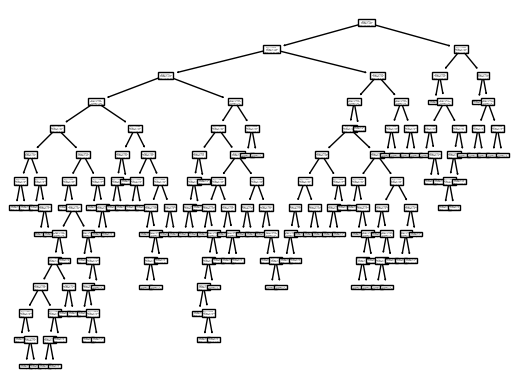

In [455]:
tree.plot_tree(model)
plt.show()

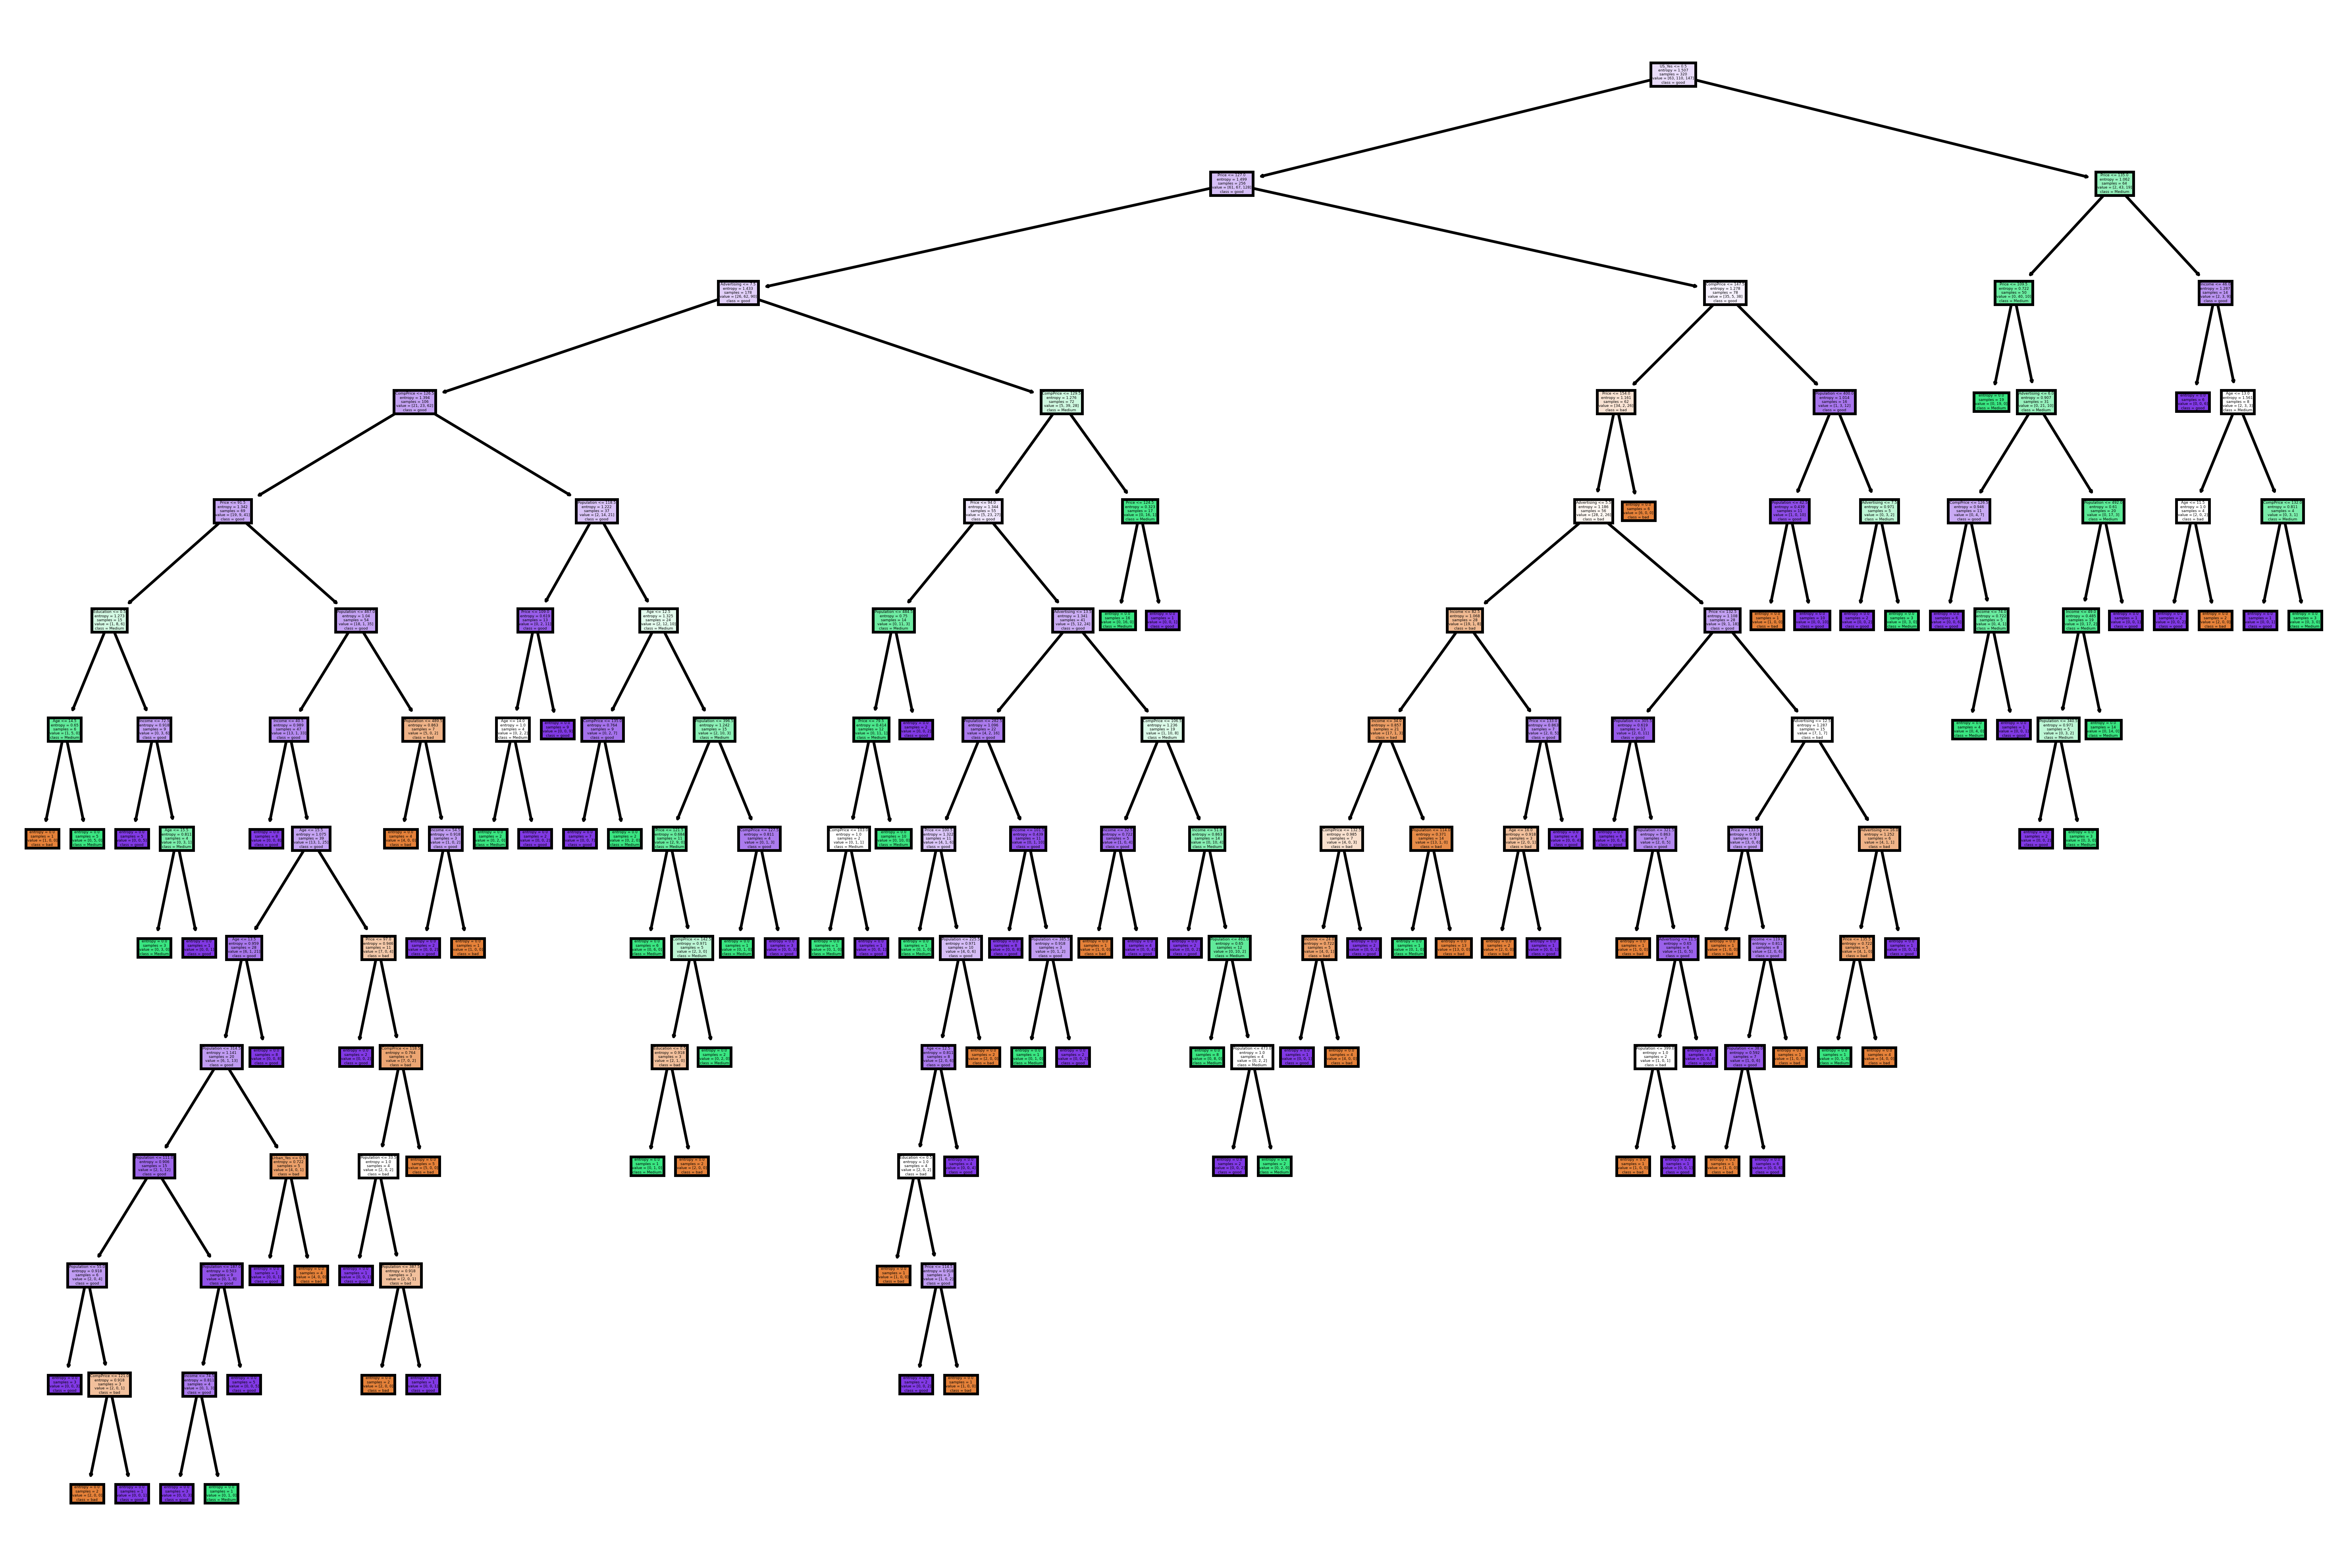

In [456]:
fn=['CompPrice','Income','Advertising','Population','Price','Age','Education','Urban_Yes','US_Yes'] # give feature names
cn=['bad', 'Medium', 'good'] # make list of category (class) names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=500) # increase size using plt.subplot
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [458]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.Series.value_counts(preds) # getting the count of each category

2    43
1    29
0     8
dtype: int64

In [459]:
preds

array([1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 0, 2, 1, 2, 0, 2, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 1, 2, 0])

In [460]:
#getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(Y_test,preds)

col_0  0   1   2
sales           
0      5   2   7
1      1  18  13
2      2   8  23
3      0   1   0

In [461]:
#check training accuracy
model.score(X_train,Y_train) 
#.score() func not need to pass predict...it automatically predict and compare with actual values....and give me accuracy.


1.0

#### Decision tree depth is max so model is trained completely so it gives 100% accuracy.

#### But 100% accuracy means model is overfitted.....we need to Performing Pruning to overcome the problem of overfitting.

In [462]:
model.score(X_test,Y_test)

0.575

#### Our model is performing well on training set but performing Average on testing data that means our model is overfitted and memorized.

#### Model should be generalized not memorized.To avoid overfitiing we need to Performing Pruning to overcome the problem of overfitting.

In [463]:
# Accurracy score
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(Y_test, y_pred)
# accuracy

### Using GridSearchCV for Hyperparameter tunning to find out best parameter for our model.

In [464]:
hyperparameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 3, 4, 5, 6,7],
    'min_samples_split': [2, 3, 4,5],
    'min_samples_leaf': [1, 2, 3],
}

grid_search = GridSearchCV(model, hyperparameters, cv=5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5]})

In [465]:
# Print the best hyperparameters and the corresponding score
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best score: 0.584375


### Performing Pruning to overcome the problem of overfitting:-
#### Calculating for max_depth=4

In [466]:
model=DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_split=5)
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=5)

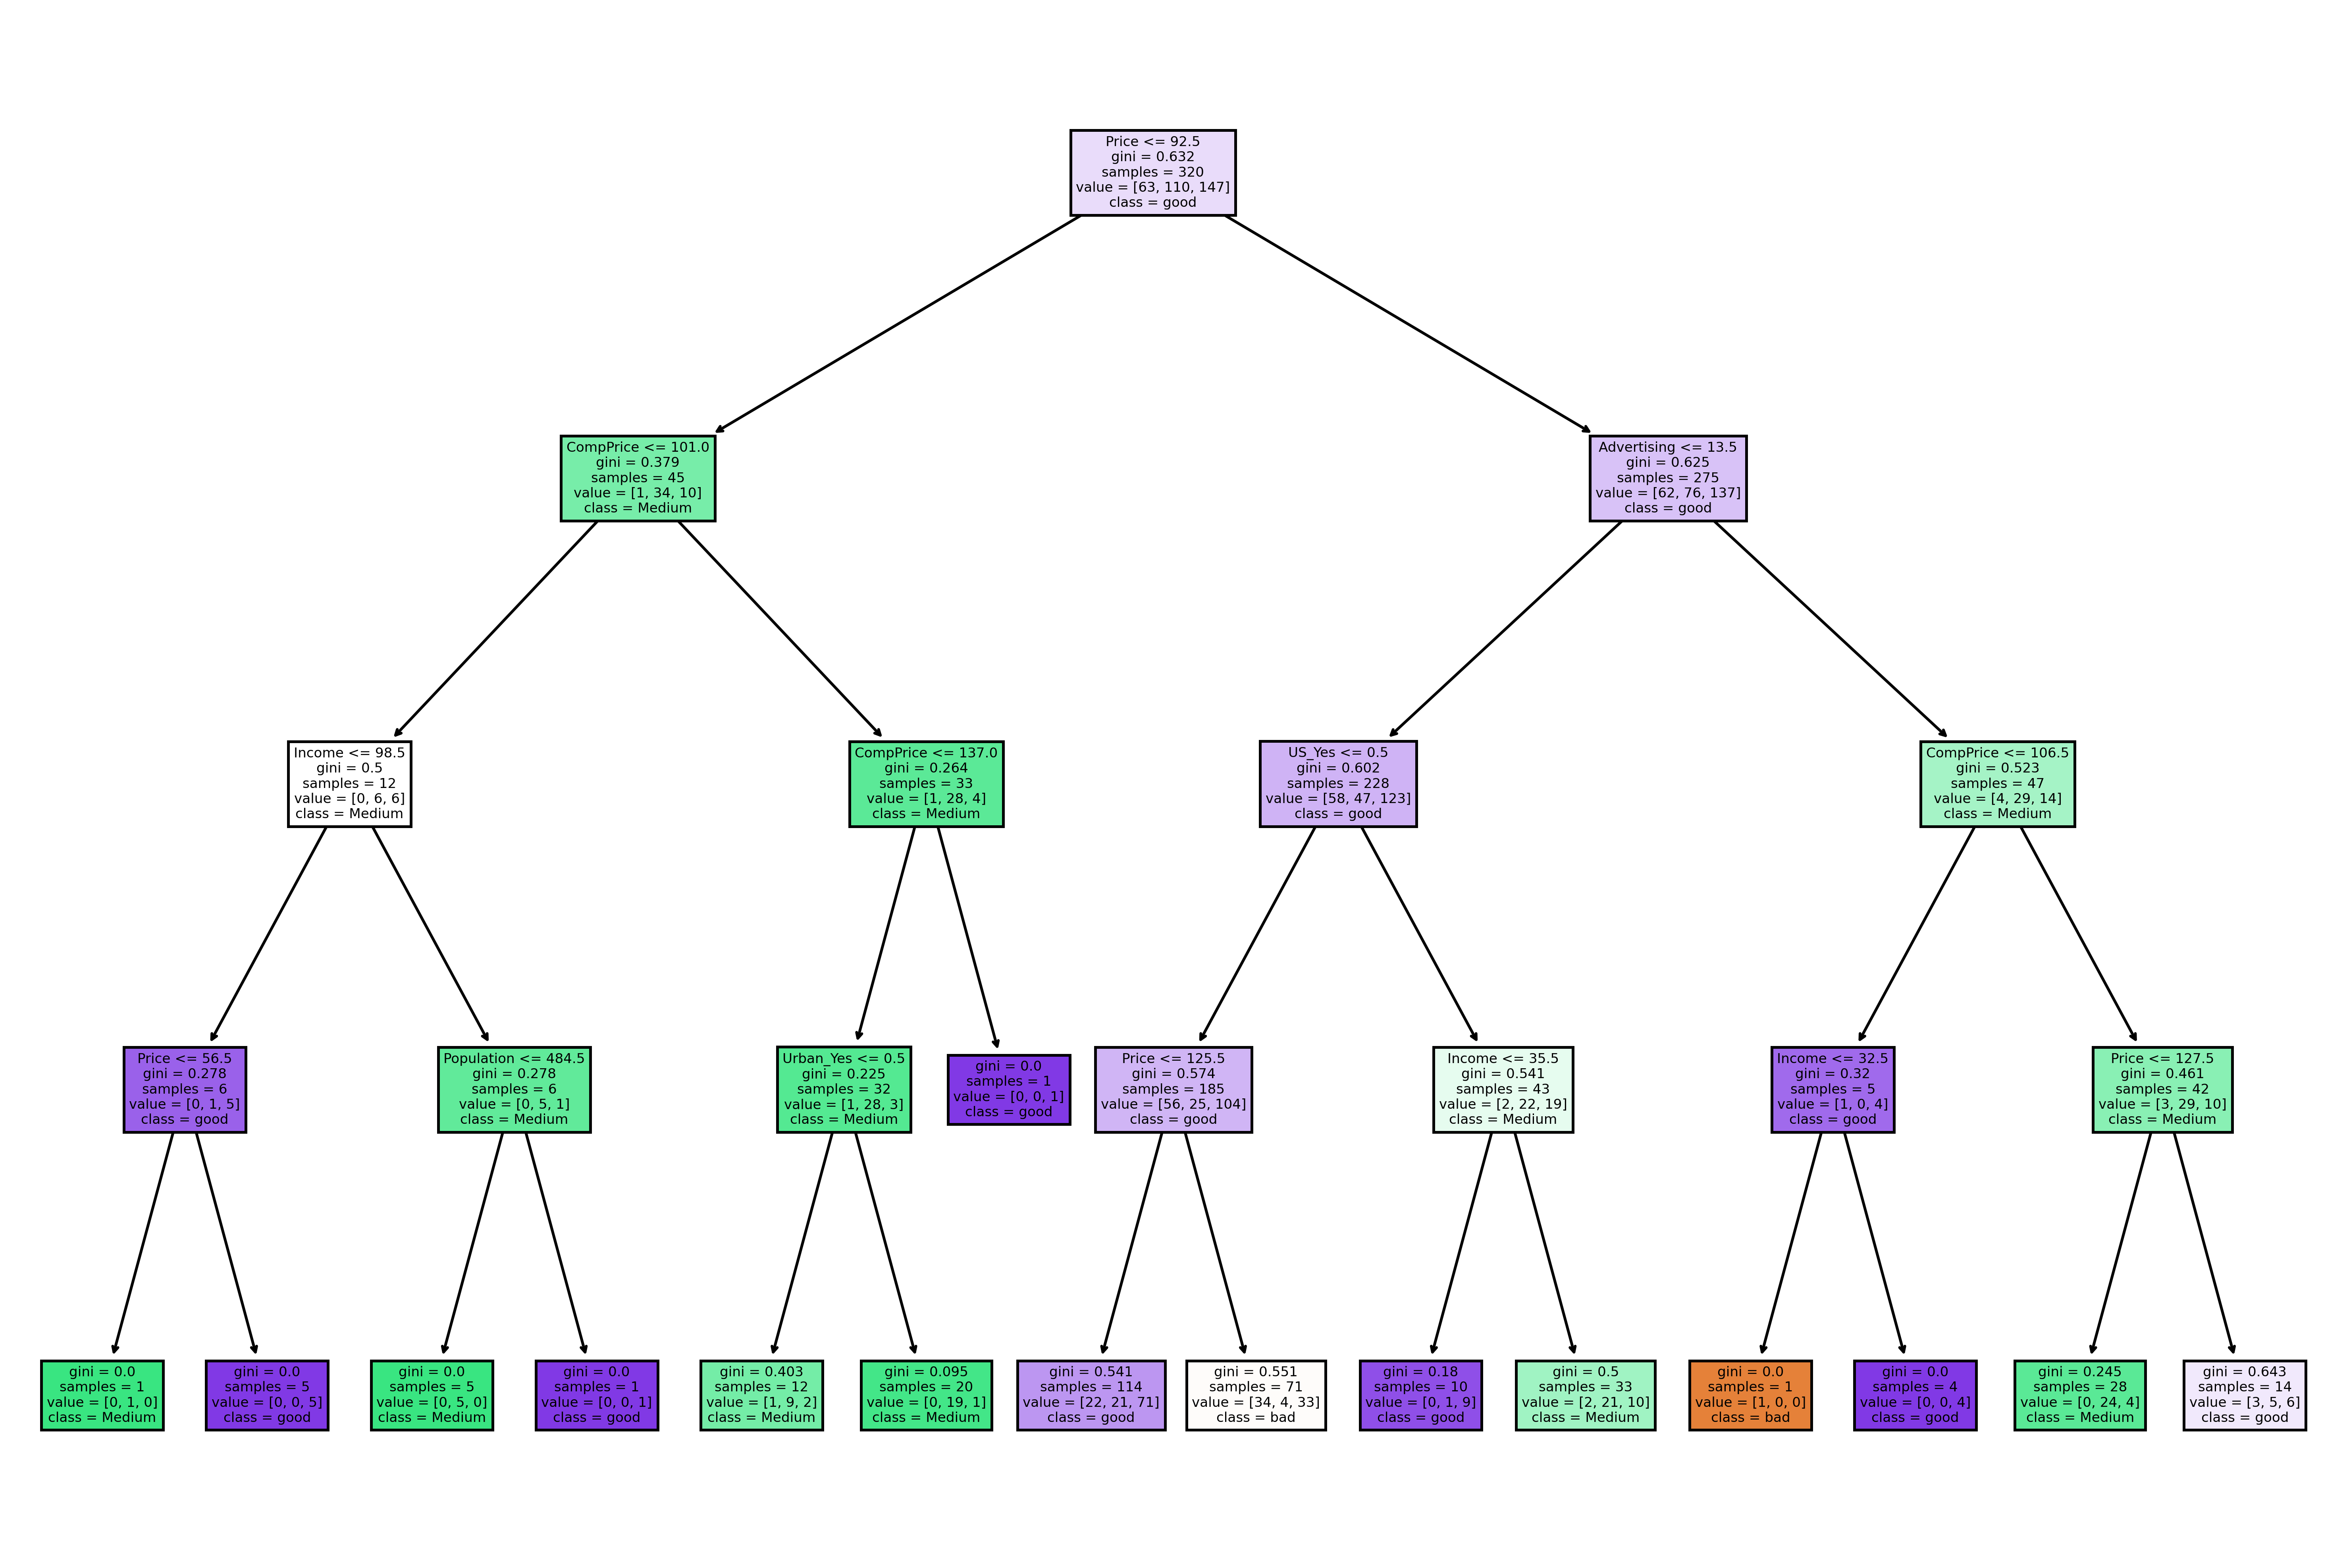

In [467]:
fn=['CompPrice','Income','Advertising','Population','Price','Age','Education','Urban_Yes','US_Yes'] # give feature names
cn=['bad', 'Medium', 'good'] # make list of category (class) names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=500) # increase size using plt.subplot
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [468]:
#check training accuracy
model.score(X_train,Y_train) 

0.659375

In [469]:
model.score(X_test,Y_test)

0.4875

### Building Decision Tree Classifier (CART) using Entropy Criteria

In [476]:
model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [477]:
# Check training accuracy
model_entropy.score(X_train, Y_train)

0.64375

In [478]:
#Check testing accuracy
model_entropy.score(X_test, Y_test) 

0.5

Using entropy Criterion we got 50% accuracy.